In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from dataloader import initAnndata

In [2]:
# read cDNA-seq data, initlize cDNA-seq anndata object
cDNA_adata = initAnndata(mtx_path='SNAREseq/cDNA/matrix.mtx',
                         features_path='SNAREseq/cDNA/genes.tsv', 
                         barcodes_path='SNAREseq/cDNA/barcodes.tsv')

In [3]:
# filter cells with fewer than 200 genes
sc.pp.filter_cells(cDNA_adata, min_genes=200)
# filter genes with fewer than 10 cells
sc.pp.filter_genes(cDNA_adata, min_cells=10)

In [4]:
sc.pp.calculate_qc_metrics(cDNA_adata, percent_top=None, inplace=True)
cDNA_adata

AnnData object with n_obs × n_vars = 10309 × 19168
    obs: 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts'
    var: 'n_cells', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

In [5]:
scales_counts = sc.pp.normalize_total(cDNA_adata, target_sum=None, inplace=False)
# log1p transform
cDNA_adata.layers["log1p_norm"] = sc.pp.log1p(scales_counts["X"], copy=True)
cDNA_adata.layers["log1p_norm"]

<10309x19168 sparse matrix of type '<class 'numpy.float64'>'
	with 9764928 stored elements in Compressed Sparse Row format>

In [6]:
sc.pp.highly_variable_genes(cDNA_adata, 
                            layer="log1p_norm",
                            n_top_genes=8000,
                            inplace=True)
cDNA_adata

/home/zhen/.local/share/virtualenvs/VirtualEnv-40UC5LHq/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


AnnData object with n_obs × n_vars = 10309 × 19168
    obs: 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts'
    var: 'n_cells', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg'
    layers: 'log1p_norm'

In [7]:
cDNA_adata = cDNA_adata[:, cDNA_adata.var.highly_variable]
cDNA_adata

View of AnnData object with n_obs × n_vars = 10309 × 8000
    obs: 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts'
    var: 'n_cells', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg'
    layers: 'log1p_norm'

In [8]:
cDNA_adata.X = cDNA_adata.layers['log1p_norm']
cDNA_adata

View of AnnData object with n_obs × n_vars = 10309 × 8000
    obs: 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts'
    var: 'n_cells', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg'
    layers: 'log1p_norm'

In [9]:
# setting highly variable as highly deviant to use scanpy 'use_highly_variable' argument in sc.pp.pca
# cDNA_adata.var["highly_variable"] = cDNA_adata.var["highly_deviant"]
sc.pp.pca(cDNA_adata, svd_solver="arpack", use_highly_variable=True)

/home/zhen/.local/share/virtualenvs/VirtualEnv-40UC5LHq/lib/python3.10/site-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca


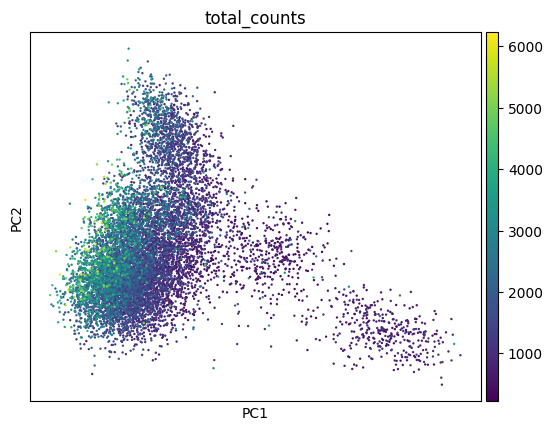

In [10]:
sc.pl.pca_scatter(cDNA_adata, color="total_counts")

In [11]:
sc.tl.tsne(cDNA_adata, use_rep="X_pca")

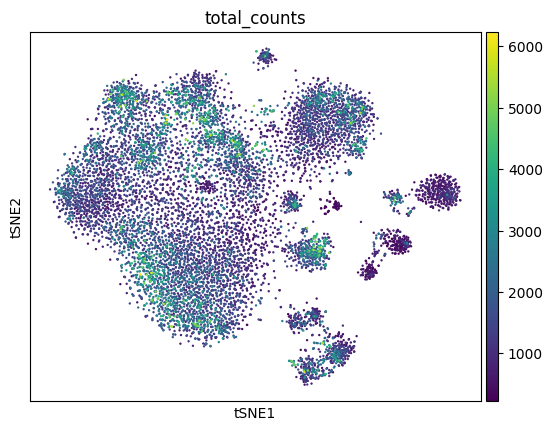

In [12]:
sc.pl.tsne(cDNA_adata, color="total_counts")

In [13]:
sc.pp.neighbors(cDNA_adata)
sc.tl.umap(cDNA_adata)

/home/zhen/.local/share/virtualenvs/VirtualEnv-40UC5LHq/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


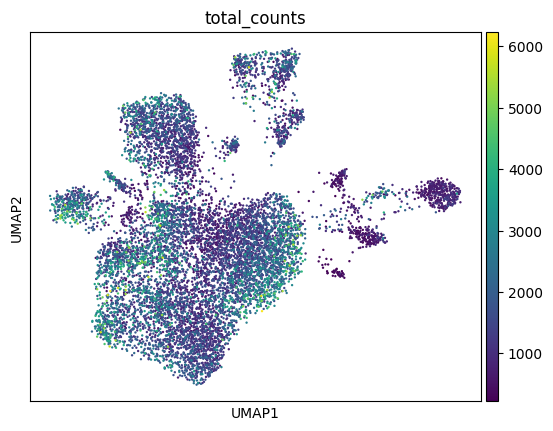

In [14]:
sc.pl.umap(cDNA_adata, color="total_counts")

In [15]:
sc.pp.scale(cDNA_adata, max_value=10)
cDNA_adata

AnnData object with n_obs × n_vars = 10309 × 8000
    obs: 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts'
    var: 'n_cells', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'pca', 'tsne', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_tsne', 'X_umap'
    varm: 'PCs'
    layers: 'log1p_norm'
    obsp: 'distances', 'connectivities'

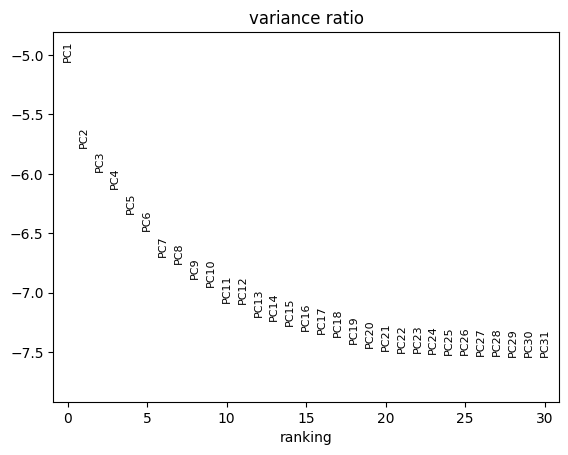

In [16]:
sc.tl.pca(cDNA_adata, svd_solver='arpack')
# sc.pl.pca(cDNA_adata, color='CST3')
sc.pl.pca_variance_ratio(cDNA_adata, log=True)

In [17]:
sc.pp.neighbors(cDNA_adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(cDNA_adata)

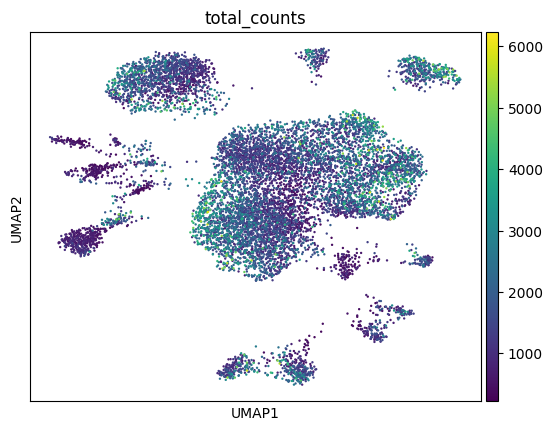

In [18]:
sc.pl.umap(cDNA_adata,  color="total_counts")